# Spotify data analysis

In [2]:
#Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_tracks = pd.read_csv('/content/drive/MyDrive/tracks.csv')
df_tracks

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


To inspect data granularity it's a good thing to check if there are many missing values. The whole dataset consits of over 580k rows and 20 columns and there are just 71 missing values. That means we can rely on the results.

In [5]:
#checking for missing values.
pd.isnull(df_tracks).sum().sum()

71

Since Spotify datasets consists of a few seperate csv files, I'll load one more to have a broader view.

In [6]:
df_artists = pd.read_csv('/content/drive/MyDrive/artists.csv')

There are many ways how to check what is the maximum value of `popularity`, one of them is using `nunique()`. We can see that it ranges from 0 up to 100.

In [7]:
df_tracks['popularity'].nunique()

101

I would like to find out what are the most popular tracks in the dataset. I'm using `query()` function here to filter out only the tracks that have `popularity` over 90, however this function can be used for filtering out tracks released in a particular year, by their duration or any other feature.

In [8]:
most_popular = df_tracks.query('popularity>90', inplace=False).sort_values('popularity', ascending=False)
most_popular[:10]


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,242014,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,164000,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,226987,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3


In the following code, I'll find out the most popular songs recently released. I've included `explicit` column as well which gives us information if a song contains explicit content.

In [9]:
pop_date = most_popular.sort_values('release_date', ascending=False)
pop_date[['name', 'popularity', 'explicit','release_date']][:20]

,name,popularity,explicit,release_date
93802,Peaches (feat. Daniel Caesar & Giveon),100,1,2021-03-19
93805,Leave The Door Open,96,0,2021-03-05
93815,What’s Next,91,1,2021-03-05
93811,Hold On,92,0,2021-03-05
93816,We're Good,91,0,2021-02-11
93813,911,91,1,2021-02-05
93809,Up,92,1,2021-02-05
93806,Fiel,94,0,2021-02-04
93808,Ella No Es Tuya - Remix,92,0,2021-02-03
93812,Wellerman - Sea Shanty / 220 KID x Billen Ted ...,92,0,2021-01-21


Here we can inspect other unique values in the sorted group `most_popular`. As we can see, within the tracks that have `popularity` over 90, there are only 37 artists.

In [10]:
most_popular.nunique()

id                  37
name                37
popularity          10
duration_ms         37
explicit             2
artists             35
id_artists          35
release_date        26
danceability        34
energy              36
key                 10
loudness            37
mode                 2
speechiness         36
acousticness        36
instrumentalness    18
liveness            34
valence             35
tempo               37
time_signature       2
dtype: int64

Since, I would like to be able to filter songs based on their relase date, I need to convert the timestamp into date format, and then add two seperate columns `month`, `year`.

In [11]:
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'])

In [15]:
year = df_tracks['release_date'].apply(lambda x : x.year)
month = df_tracks['release_date'].apply(lambda x : x.month)
df_tracks.insert(loc=8, column='year', value=year) 
df_tracks.insert(loc=9, column='month', value=month)

We can see what is the maximum span of the date.

In [14]:
df_tracks['release_date'].max()

Timestamp('2021-04-16 00:00:00')

Finding out what year were the oldest songs in the datasets released.

In [17]:
df_tracks['year']

0         1922
1         1922
2         1922
3         1922
4         1922
          ... 
586667    2020
586668    2020
586669    2020
586670    2021
586671    2015
Name: year, Length: 586672, dtype: int64

Here, I can see the oldest tracks.

In [18]:
oldest = df_tracks.sort_values('year')
oldest

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,year,month,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
478627,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,19,233920,0,['Los Pincheira del Sur'],['1BnQrx8p0bHBpidjIGq26z'],1900-01-01,1900,1,0.659,0.791,2,-4.895,1,0.0295,0.1390,0.000002,0.1610,0.956,141.999,4
132350,3AwlEhAkDDwKuTaNlgmMNQ,Nola,0,233426,0,"['Vincent Lopez and his Orchestra', 'Vincent L...","['1NElogFmaZxxGVsKS6hvl2', '3wxzXhMAoYbpJDXtBx...",1922-01-01,1922,1,0.567,0.663,2,-5.334,1,0.0318,0.9920,0.878000,0.2680,0.853,103.394,4
132349,32Y9PU9JqxYFqzFaIdCQOs,Midnight rose,0,195862,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922-01-01,1922,1,0.483,0.060,1,-9.499,1,0.0420,0.9820,0.000089,0.0498,0.381,136.044,4
132348,2zRV6Vk6ZQYDokmiv5QEoP,California blues,0,195470,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']","['6LxnbCQ3ZrKj1lvC1lylS5', '3cNzWID6yZ1HN8qj4g...",1922-01-01,1922,1,0.578,0.462,8,-7.217,1,0.0398,0.9950,0.903000,0.0767,0.513,89.876,4
132347,2uqaxtC6Usy7QeKfoD1jhB,Good evenin',0,189649,0,"['Isham Jones & His Orchestra', 'Isham Jones']","['65A1WinXDUhVkZD98s8kKU', '4OWTlYl5kkhaZEsyjU...",1922-01-01,1922,1,0.565,0.334,10,-6.802,1,0.0309,0.9780,0.032900,0.2560,0.550,97.167,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211946,4XZ0ow6wtWOxDy0WMMzcBG,Somos Iguales,1,236587,0,"['Jhay Cortez', 'Zion & Lennox']","['0EFisYRi20PTADoJrifHrz', '21451j1KhjAiaYKflx...",2021-04-09,2021,4,0.777,0.714,11,-4.296,1,0.0532,0.1600,0.000000,0.1150,0.590,90.987,4
211945,4RU0r5hnonG58XU4NqCBto,No Me Conoce - Remix,0,309120,0,"['Jhay Cortez', 'J Balvin', 'Bad Bunny']","['0EFisYRi20PTADoJrifHrz', '1vyhD5VmyZ7KMfW5gq...",2021-04-14,2021,4,0.804,0.786,10,-3.837,0,0.0735,0.1440,0.000000,0.0928,0.575,91.992,4
211944,4HdpcPFATP6heiXec1GWH0,CÓMO SE SIENTE - Remix,0,227520,1,"['Jhay Cortez', 'Bad Bunny']","['0EFisYRi20PTADoJrifHrz', '4q3ewBCX7sLwd24euu...",2021-04-15,2021,4,0.807,0.606,3,-8.871,0,0.0872,0.0946,0.000000,0.1190,0.304,92.988,4
211955,6cI7wJTCwrvcfIuapt9JCC,Imaginaste - Remix,1,246653,0,"['Jhay Cortez', 'Wisin & Yandel']","['0EFisYRi20PTADoJrifHrz', '1wZtkThiXbVNtj6hee...",2021-04-09,2021,4,0.855,0.710,1,-5.321,1,0.0939,0.0426,0.000000,0.3370,0.591,89.977,4


Here, I'm checking the max values of features I'm interested in.

In [12]:
df_tracks['popularity'].max()

100

In [13]:
df_tracks['danceability'].max()

0.991

Unfortunately, the dataset doesn't have the data containing information which songs where most popular in a given time, however I can see what sort of songs were release in March 2020. 

In [19]:
most_popular_march_20 = df_tracks.query('(popularity > 80) and (year in ["2020"]) and (month in ["3"])')
most_popular_march_20

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,year,month,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,2020,3,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,2020,3,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,2020,3,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3
92853,4xqrdfXkTW4T0RauPLv3WA,Heather,89,198040,0,['Conan Gray'],['4Uc8Dsxct0oMqx0P6i60ea'],2020-03-20,2020,3,0.357,0.425,5,-7.301,1,0.0333,0.58400,0.000000,0.3220,0.270,102.078,3
92867,5nujrmhLynf4yMoMtj8AQF,Levitating (feat. DaBaby),89,203064,0,"['Dua Lipa', 'DaBaby']","['6M2wZ9GZgrQXHCFfjv46we', '4r63FhuTkUYltbVAg5...",2020-03-27,2020,3,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,4
92927,7szuecWAPwGoV1e5vGu8tl,In Your Eyes,86,237520,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,2020,3,0.667,0.719,7,-5.371,0,0.0346,0.00285,0.000081,0.0736,0.717,100.021,4
92951,6KfoDhO4XUWSbnyKjNp9c4,Maniac,86,185773,0,['Conan Gray'],['4Uc8Dsxct0oMqx0P6i60ea'],2020-03-20,2020,3,0.628,0.639,8,-5.460,1,0.0435,0.00162,0.000000,0.3540,0.493,108.045,4
92961,3PfIrDoz19wz7qK7tYeu62,Don't Start Now,85,183290,0,['Dua Lipa'],['6M2wZ9GZgrQXHCFfjv46we'],2020-03-27,2020,3,0.793,0.793,11,-4.521,0,0.0830,0.01230,0.000000,0.0951,0.679,123.950,4
92995,5m5aY6S9ttfIG157xli2Rs,Alô Ambev (Segue Sua Vida) - Ao Vivo,84,169593,0,['Zé Neto & Cristiano'],['487N2T9nIPEHrlTZLL3SQs'],2020-03-26,2020,3,0.695,0.872,9,-3.650,1,0.0868,0.33400,0.000000,0.9540,0.646,121.843,4
93021,527k23H0A4Q0UJN3vGs0Da,After Party,84,167916,1,['Don Toliver'],['4Gso3d4CscCijv0lmajZWs'],2020-03-13,2020,3,0.629,0.692,5,-8.045,1,0.0376,0.00981,0.331000,0.6030,0.453,162.948,4


The titles that gained popularity are interesting: 'Save your Tears', 'Heartbrean Anniversary', 'Maniac' or 'Heartless'.

In [28]:
most_popular_march_20.sort_values('popularity', ascending=False)


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,year,month,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,215627,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,2020,3,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,200040,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,2020,3,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,198371,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,2020,3,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3
92853,4xqrdfXkTW4T0RauPLv3WA,Heather,89,198040,0,['Conan Gray'],['4Uc8Dsxct0oMqx0P6i60ea'],2020-03-20,2020,3,0.357,0.425,5,-7.301,1,0.0333,0.58400,0.000000,0.3220,0.270,102.078,3
92867,5nujrmhLynf4yMoMtj8AQF,Levitating (feat. DaBaby),89,203064,0,"['Dua Lipa', 'DaBaby']","['6M2wZ9GZgrQXHCFfjv46we', '4r63FhuTkUYltbVAg5...",2020-03-27,2020,3,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,4
92927,7szuecWAPwGoV1e5vGu8tl,In Your Eyes,86,237520,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,2020,3,0.667,0.719,7,-5.371,0,0.0346,0.00285,0.000081,0.0736,0.717,100.021,4
92951,6KfoDhO4XUWSbnyKjNp9c4,Maniac,86,185773,0,['Conan Gray'],['4Uc8Dsxct0oMqx0P6i60ea'],2020-03-20,2020,3,0.628,0.639,8,-5.460,1,0.0435,0.00162,0.000000,0.3540,0.493,108.045,4
92961,3PfIrDoz19wz7qK7tYeu62,Don't Start Now,85,183290,0,['Dua Lipa'],['6M2wZ9GZgrQXHCFfjv46we'],2020-03-27,2020,3,0.793,0.793,11,-4.521,0,0.0830,0.01230,0.000000,0.0951,0.679,123.950,4
93025,017PF4Q3l4DBUiWoXk4OWT,Break My Heart,84,221820,0,['Dua Lipa'],['6M2wZ9GZgrQXHCFfjv46we'],2020-03-27,2020,3,0.730,0.729,4,-3.434,0,0.0883,0.16700,0.000001,0.3490,0.467,113.013,4
93021,527k23H0A4Q0UJN3vGs0Da,After Party,84,167916,1,['Don Toliver'],['4Gso3d4CscCijv0lmajZWs'],2020-03-13,2020,3,0.629,0.692,5,-8.045,1,0.0376,0.00981,0.331000,0.6030,0.453,162.948,4


# Visualizing the impact of particular features on popularity

Text(0.5, 1.0, 'Impact of danceability on popularity')

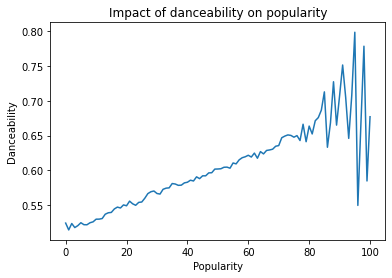

In [21]:
p = df_tracks.groupby('popularity')['danceability'].mean()
plt.plot(p)
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('Impact of danceability on popularity')

Text(0.5, 1.0, 'Impact of instrumentalness on popularity')

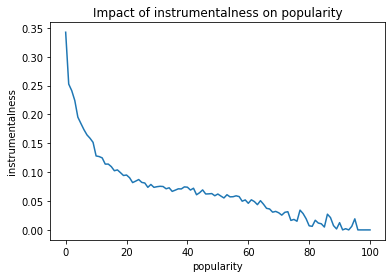

In [22]:
t = df_tracks.groupby('popularity')['instrumentalness'].mean()
plt.plot(t)
plt.xlabel('popularity')
plt.ylabel('instrumentalness')
plt.title('Impact of instrumentalness on popularity')

Text(0.5, 1.0, 'How duration of songs changed over time')

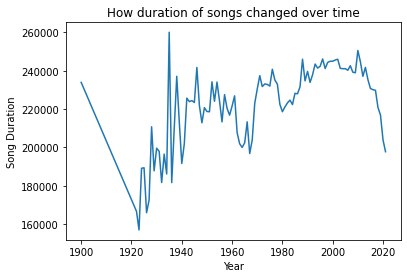

In [23]:
d = df_tracks.groupby('year')['duration_ms'].mean()
plt.plot(d)
plt.xlabel('Year')
plt.ylabel('Song Duration')
plt.title('How duration of songs changed over time')

# Features Matrix

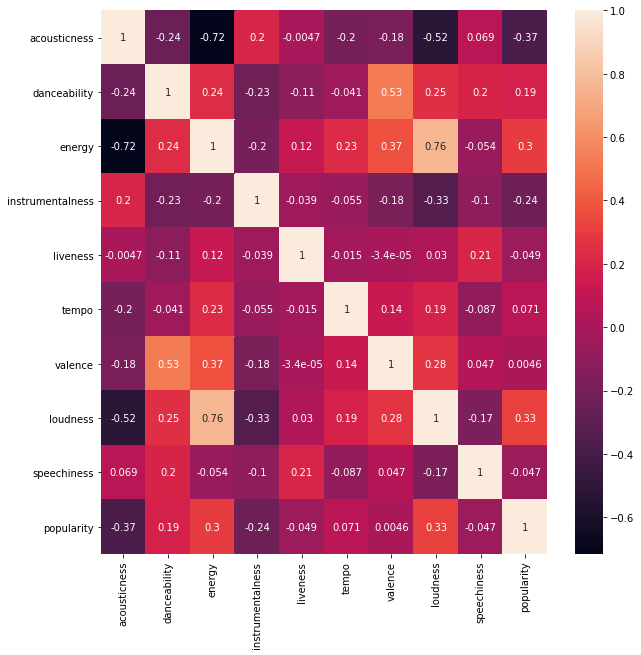

In [24]:
features = df_tracks[["acousticness","danceability","energy", "instrumentalness", 
           "liveness","tempo", "valence", "loudness", "speechiness", "popularity"]]

plt.figure(figsize=(10,10))
sns.heatmap(features.corr(), annot=True)

plt.savefig('/content/drive/MyDrive/matrix')

Checking the most popular artists this time.

In [25]:
df_artists.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [26]:
# Remove data due to less computational power
artists_popular = df_artists.sort_values(by=['popularity'], ascending=False)
artists_popular[:10]

,id,followers,genres,name,popularity
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100
115489,4q3ewBCX7sLwd24euuV69X,32244734.0,"['latin', 'reggaeton', 'trap latino']",Bad Bunny,98
126338,06HL4z0CvFAxyc27GXpf02,38869193.0,"['pop', 'post-teen pop']",Taylor Swift,98
313676,3TVXtAsR1Inumwj472S9r4,54416812.0,"['canadian hip hop', 'canadian pop', 'hip hop'...",Drake,98
144484,3Nrfpe0tUJi4K4DXYWgMUX,31623813.0,"['k-pop', 'k-pop boy group']",BTS,96
115490,4MCBfE4596Uoi2O4DtmEMz,16996777.0,"['chicago rap', 'melodic rap']",Juice WRLD,96
144483,1Xyo4u8uXC1ZmMpatF05PJ,31308207.0,"['canadian contemporary r&b', 'canadian pop', ...",The Weeknd,96
144485,66CXWjxzNUsdJxJ2JdwvnR,61301006.0,"['pop', 'post-teen pop']",Ariana Grande,95
144486,1vyhD5VmyZ7KMfW5gqLgo5,27286822.0,"['latin', 'reggaeton', 'reggaeton colombiano',...",J Balvin,95
115491,7iK8PXO48WeuP03g8YR51W,5001808.0,['trap latino'],Myke Towers,95


Filtering the genres of the most popular musicians.

In [27]:
pop_genres = df_artists.sort_values(by ='genres').sort_values('popularity', ascending=False)
pop_genres[['genres', 'popularity']][:30]

,genres,popularity
144481,"['canadian pop', 'pop', 'post-teen pop']",100
313676,"['canadian hip hop', 'canadian pop', 'hip hop'...",98
126338,"['pop', 'post-teen pop']",98
115489,"['latin', 'reggaeton', 'trap latino']",98
144484,"['k-pop', 'k-pop boy group']",96
115490,"['chicago rap', 'melodic rap']",96
144483,"['canadian contemporary r&b', 'canadian pop', ...",96
115491,['trap latino'],95
144487,"['dance pop', 'pop', 'uk pop']",95
144485,"['pop', 'post-teen pop']",95
